In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1.import data

In [2]:
data_set=pd.read_csv('C:\\Users\\User\\100-Days-Of-ML-Code-master\\datasets\\Social_Network_Ads.csv')

In [3]:
data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
data_set.shape

(400, 5)

# 2.data preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler

In [8]:
data_set2=data_set[['Age','EstimatedSalary']]
data_set2=pd.DataFrame(data=StandardScaler().fit_transform(data_set2),columns=['Age','EstimatedSalary'])
data_set2.head()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [10]:
data_set2=pd.concat([data_set2,pd.DataFrame(data_set['Purchased'])],axis=1)

In [11]:
from  sklearn.model_selection import train_test_split

In [15]:
X=data_set2.iloc[:,:-1]
Y=data_set2.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

# 3.model fitting

In [13]:
from sklearn.svm import SVC

(1)線性fitting

In [59]:
model_jmda_linear=SVC(kernel='linear',random_state=1)
model_jmda_linear.fit(x_train,y_train)
model_jmda_linear.score(x_train,y_train),model_jmda_linear.score(x_test,y_test)

(0.8285714285714286, 0.8666666666666667)

(2)非線性fitting

In [60]:
model_jmda_rbf=SVC(kernel='rbf',random_state=1)
model_jmda_rbf.fit(x_train,y_train)
model_jmda_rbf.score(x_train,y_train),model_jmda_rbf.score(x_test,y_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(0.9178571428571428, 0.9083333333333333)

# 4.visualization

In [64]:
##製造占滿x1(Age),x2(EstimatedSalary)的點
xx=np.linspace(data_set2['Age'].min(),data_set2['Age'].max(),500)
yy=np.linspace(data_set2['EstimatedSalary'].min(),data_set2['EstimatedSalary'].max(),500)
x1,x2=np.meshgrid(xx,yy)

##將做出來的x1,x2組合成帶入model的格式，並求得預測結果(y_grid)
grid=np.concatenate([x1.reshape(-1,1),x2.reshape(-1,1)],axis=1)

##將做出來的x1,x2帶入model得出預測結果(y_grid)
y_grid=model_jmda_linear.predict(grid).reshape(-1,1)

##將做出來的x1,x2,y_grid組成一個dataframe方便作圖
mapdata=np.concatenate([grid,y_grid],axis=1)
mapdataframe=pd.DataFrame(data=mapdata,columns=['Age','EstimatedSalary','Purchased'])
mapdataframe.head()

,Age,EstimatedSalary,Purchased
0,-1.877311,-1.607506,0.0
1,-1.869271,-1.607506,0.0
2,-1.861232,-1.607506,0.0
3,-1.853193,-1.607506,0.0
4,-1.845154,-1.607506,0.0


In [54]:
import seaborn as sns

Text(0.5, 1.0, 'linear fitting')

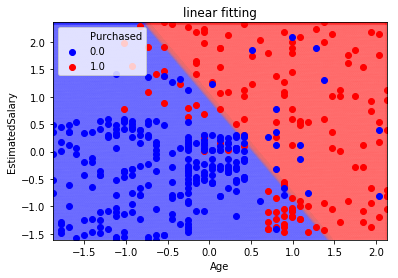

In [65]:
#畫背景區分圖(預測model)
sns.scatterplot(data=mapdataframe,x='Age',y='EstimatedSalary',hue='Purchased',palette=['blue','red'],alpha=0.05)
#畫實際結果
plt.scatter(x=data_set2['Age'][data_set2['Purchased']==1],y=data_set2['EstimatedSalary'][data_set2['Purchased']==1],color='red')
plt.scatter(x=data_set2['Age'][data_set2['Purchased']==0],y=data_set2['EstimatedSalary'][data_set2['Purchased']==0],color='blue')
#設定圖片x1,x2範圍
plt.xlim(data_set2['Age'].min(),data_set2['Age'].max())
plt.ylim(data_set2['EstimatedSalary'].min(),data_set2['EstimatedSalary'].max())
plt.title('linear fitting')

Text(0.5, 1.0, 'non-linear fitting')

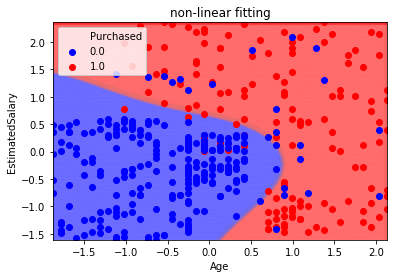

In [66]:
xx=np.linspace(data_set2['Age'].min(),data_set2['Age'].max(),500)
yy=np.linspace(data_set2['EstimatedSalary'].min(),data_set2['EstimatedSalary'].max(),500)
x1,x2=np.meshgrid(xx,yy)
grid=np.concatenate([x1.reshape(-1,1),x2.reshape(-1,1)],axis=1)
y_grid=model_jmda_rbf.predict(grid).reshape(-1,1)
mapdata=np.concatenate([grid,y_grid],axis=1)
mapdataframe=pd.DataFrame(data=mapdata,columns=['Age','EstimatedSalary','Purchased'])
sns.scatterplot(data=mapdataframe,x='Age',y='EstimatedSalary',hue='Purchased',palette=['blue','red'],alpha=0.05)
plt.scatter(x=data_set2['Age'][data_set2['Purchased']==1],y=data_set2['EstimatedSalary'][data_set2['Purchased']==1],color='red')
plt.scatter(x=data_set2['Age'][data_set2['Purchased']==0],y=data_set2['EstimatedSalary'][data_set2['Purchased']==0],color='blue')
plt.xlim(data_set2['Age'].min(),data_set2['Age'].max())
plt.ylim(data_set2['EstimatedSalary'].min(),data_set2['EstimatedSalary'].max())
plt.title('non-linear fitting')